project 3: clustering

In [1029]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt #plotting graphs
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import RobustScaler
import warnings
from sklearn.cluster import KMeans
from sklearn.neighbors import NearestCentroid
warnings.filterwarnings('ignore')

from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs

print(".")
#importing libraries

.


In [1030]:
#load the ekg dataset into a pandas dataframe
#11500 samples, each with 178 features
data = pd.read_csv('train.dat', header=None)
data

,0,1,2,3,4,5,6,7,8,9,...,168,169,170,171,172,173,174,175,176,177
0,-34,-45,-47,-43,-34,-21,4,33,47,39,...,52,37,17,9,11,36,50,54,45,30
1,76,89,104,100,84,46,-1,-44,-69,-71,...,-38,-18,12,52,82,97,97,69,34,-14
2,-53,-80,-64,-46,-55,-62,-53,-55,-71,-60,...,-26,-34,-59,-84,-79,-69,-61,-42,-27,-20
3,28,29,25,15,8,-3,-1,-2,-4,-1,...,-13,-8,-2,3,5,10,2,6,7,12
4,57,82,93,68,23,-26,-40,-27,-3,5,...,-21,1,17,22,-5,-22,-45,-35,-37,-42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11495,-23,4,10,6,27,52,81,-151,-150,-120,...,-2,-17,-43,-93,-138,-166,-160,-123,-66,-7
11496,-15,-33,-43,-58,-65,-76,-64,-53,-44,-43,...,-62,-77,-84,-78,-66,-41,-22,-18,-17,-19
11497,10,8,13,19,18,14,19,19,26,49,...,39,27,10,-9,-12,-12,-3,4,15,17
11498,-19,77,168,199,182,140,126,158,199,229,...,-727,-573,-438,-328,-238,-196,-152,-104,-8,161


In [1031]:
#trying dbscan
#dbscan performs poorly with high-dimensional data
#need to reduce dimension

#we also want to standardize the data
#next try max abs scaler
data = data.values[:,:]
ss = StandardScaler()
mas = MaxAbsScaler()
#data = mas.fit_transform(data) #fit transform the data using the selected scaler
data = pd.DataFrame(data)
#print(data)

print(data.loc[0,0], data.loc[0,14])
# print(data3.loc[0])

#create 2d numpy array to hold the standardized data
np_arr1 = np.ndarray(shape=(11500,2))

for i in range(11500): #0 and 7,14, 19
    #extract features by taking mean of adjacent times to get more accurate value
    # exfeat1 = np.mean(data.loc[i,0:3])
    # exfeat2 = np.mean(data.loc[i,6:9])
    # np_arr1[i] = ( exfeat1, exfeat2 )
    np_arr1[i] = ( data.loc[i,0], data.loc[i,6] )

np_arr1[:10]

-34 4


array([[-34.,   4.],
       [ 76.,  -1.],
       [-53., -53.],
       [ 28.,  -1.],
       [ 57., -40.],
       [  3., -35.],
       [ 99., 140.],
       [-52., -20.],
       [-10.,   6.],
       [202., 150.]])

In [1032]:
#perform DBSCAN on the array

db = DBSCAN(eps=.01755, min_samples=2).fit(np_arr1)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

#we want to tune the hyperparameters until we achieve 115 clusters
print('Estimated number of clusters: %d' % n_clusters_)

Estimated number of clusters: 1114


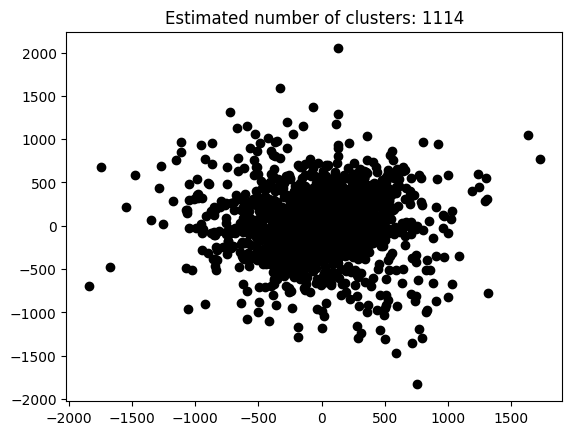

In [1033]:
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = np_arr1[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = np_arr1[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

In [1034]:
#performing kmeans clustering on the array
kmm = KMeans(n_clusters=115, random_state=0, n_init="auto")
clustlabels = kmm.fit_predict(np_arr1)

clustlabels, len(clustlabels)

(array([ 30,  61,  41, ..., 113, 104,  54]), 11500)

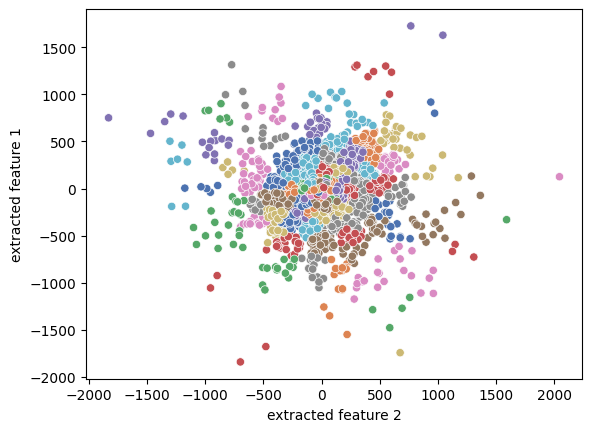

In [1035]:
#this is how default Kmeans function operates with 5 clusters
sns.scatterplot(x=np_arr1[:,1],
                y=np_arr1[:,0],
                hue=clustlabels,
                palette="deep",
                legend = None
                )
plt.xlabel('extracted feature 2')
plt.ylabel('extracted feature 1')
plt.show()

In [1036]:
print(len(clustlabels), clustlabels)

#write cluster label predictions to an output file
with open("output.dat", "w") as fh:
    #iterate through all of the samples
    for i in range(len(clustlabels)):
        #if sample is in cluster 0, write as cluster 115
        if(clustlabels[i] == 0):
            fh.write('115')

        #otherwise write the number of the cluster
        else:
            fh.write(str(clustlabels[i]))

        fh.write('\n')

#writing cluster label prediction, for DBMEAN algorithm
# with open("output.dat", "w") as fh:
#     for i in range(len(labels)):
#         if(labels[i] != -1):
#             fh.write(str(labels[i]))
#             fh.write('\n')
#         else:
#             fh.write('115')
#             fh.write('\n')

11500 [ 30  61  41 ... 113 104  54]
